In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [5]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
lin_clf = LinearSVC(loss="hinge", C=1, )
lin_clf.fit(X_scaled, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [41]:
svc_clf = SVC(kernel="linear", C=1)
svc_clf.fit(X_scaled, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
sgd_clf = SGDClassifier(loss="hinge", eta0=0.001, alpha = 0.1)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
def get_x1_pred(clf, x0):
    b = clf.intercept_[0]
    w = clf.coef_[0]
    w0 = w[0]
    w1 = w[1]
    x1 = (-w0 / w1) * x0 - (b / w1)
    return x1

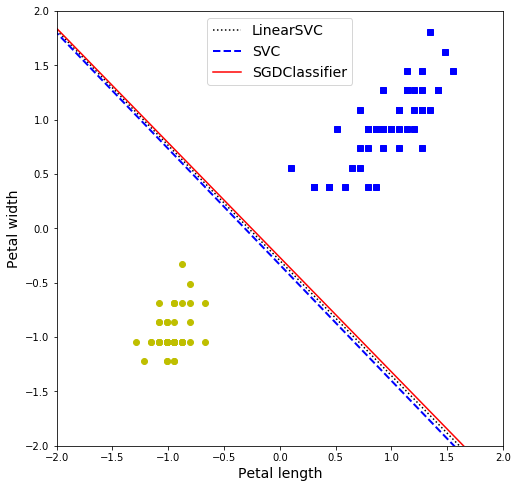

In [53]:
plt.figure(figsize=(8, 8))
plt.plot([-5, get_x1_pred(lin_clf, -5)], [5, get_x1_pred(lin_clf, 5)], "k:", label="LinearSVC")
plt.plot([-5, get_x1_pred(svc_clf, -5)], [5, get_x1_pred(svc_clf, 5)], "b--", linewidth=2, label="SVC")
plt.plot([-5, get_x1_pred(sgd_clf, -5)], [5, get_x1_pred(sgd_clf, 5)], "r-", label="SGDClassifier")
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([-2, 2, -2, 2])

plt.show()